MVP Engenharia de Dados

In [0]:
'''
Objetivo: Analisar títulos contidos nos dados do IMDB
Perguntas a serem respondidas:
    1 - Quantidade de títulos ano a ano a partir de 2015, e sua evolução anual em percentual.
    2 - Qual gênero teve maior quantidade em 2023?
    3 - Em relação a 2022, esse gênero aumentou a quantidade de títulos ou diminuiu? Resultado em quantidade e percentual.

'''

Out[56]: '\nObjetivo: Analisar filmes contidos nos dados do IMDB\nPerguntas a serem respondidas:\n    1 - Quantidade de filmes ano a ano a partir de 2015, e sua evolução anual em percentual.\n    2 - Qual gênero teve maior quantidade em 2023?\n    3 - Em relação a 2022, esse gênero aumentou a quantidade de filmes ou diminuiu? Resultado em quantidade e percentual.\n    \n'

In [0]:
# Importando biliotecas necessárias

from io import BytesIO
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Criando títulos da tabela e importando do site

import requests
import pandas as pd
from io import BytesIO

df_link = requests.get('https://datasets.imdbws.com/title.basics.tsv.gz')
df_original = pd.read_csv(BytesIO(df_link.content), compression='gzip', header=0, sep='\t',
                 dtype={'tconst': str,
                        'titletype': str,
                        'primaryTitle': str,
                        'originalTitle': str,
                        'isAdult': str,
                        'startYear': str,
                        'endYear': str,
                        'runtimeMinutes': str,
                        'genres': str})

df_original.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [0]:
# Selecionando apenas colunas necessárias de acordo com o problema definido

df_tratado = df_original.copy()
df_tratado = df_tratado[['tconst', 'titleType' ,'primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres']]
df_tratado.head(1)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short"


In [0]:
# Analisando se o df tem linhas em branco e removendo

df_tratado = df_tratado.replace('\\N', None)
df_tratado = df_tratado.dropna()

In [0]:
# Verificando se o df possui linhas duplicadas

len(df_tratado[df_tratado.duplicated(keep=False)])

Out[61]: 0

In [0]:
# Analisando os tipos de colunas se correspondem aos dados
df_tratado.dtypes

Out[62]: tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear         object
runtimeMinutes    object
genres            object
dtype: object

In [0]:
# Ajustando tipagem de colunas numéricas

df_tratado['startYear'] = df_tratado['startYear'].astype(int)
df_tratado['runtimeMinutes'] = df_tratado['runtimeMinutes'].astype(int)

In [0]:
df_tratado.dtypes

Out[64]: tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear          int64
runtimeMinutes     int64
genres            object
dtype: object

In [0]:
df_tratado.columns

Out[65]: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres'],
      dtype='object')

In [0]:
# Copiando df, para responder as perguntas postriormente, pois na próxima etapa ele será alterado para ser armazenado no banco de dados

df_analise = df_tratado.copy()

In [0]:
# Modelando dados para o Esquema Estrela

'''
As tabelas dimensões serão criadas a partir dos valores únicos da tabela fato, e nessa tabelas fato serão criados os ids para cada item registrado

'''

# Criando dimensões

# Dimensão titleType
valores_unicos_ = df_tratado['titleType'].unique()
D_titleType = pd.DataFrame(valores_unicos_, columns=['titleType'])
D_titleType['id'] = range(len(D_titleType))


# Dimensão primaryTitle
valores_unicos_ = df_tratado['primaryTitle'].unique()
D_primaryTitle = pd.DataFrame(valores_unicos_, columns=['primaryTitle'])
D_primaryTitle['id'] = range(len(D_primaryTitle))

# Dimensão originalTitle
valores_unicos_ = df_tratado['originalTitle'].unique()
D_originalTitle = pd.DataFrame(valores_unicos_, columns=['originalTitle'])
D_originalTitle['id'] = range(len(D_originalTitle))

# Dimensão startYear
valores_unicos_ = df_tratado['startYear'].unique()
D_startYear = pd.DataFrame(valores_unicos_, columns=['startYear'])
D_startYear['id'] = range(len(D_startYear))

# Dimensão runtimeMinutes
valores_unicos_ = df_tratado['runtimeMinutes'].unique()
D_runtimeMinutes = pd.DataFrame(valores_unicos_, columns=['runtimeMinutes'])
D_runtimeMinutes['id'] = range(len(D_runtimeMinutes))

# Dimensão genres
valores_unicos_ = df_tratado['genres'].unique()
D_genres = pd.DataFrame(valores_unicos_, columns=['genres'])
D_genres['id'] = range(len(D_genres))

In [0]:
# Gerando a tabela fato com as transformações a partir das dimensões

'''
Após as dimensões terem sido criadas, a tabela fato será alterada, para conter apenas os ids, assim reduzir o armazenamento de muitos caracteres para ids

'''

# Tratando titleType
mapeamento_titleType = D_titleType.set_index('titleType')['id'].to_dict()
df_tratado['titleType'] = df_tratado['titleType'].map(mapeamento_titleType)

# Tratando primaryTitle
mapeamento_primaryTitle = D_primaryTitle.set_index('primaryTitle')['id'].to_dict()
df_tratado['primaryTitle'] = df_tratado['primaryTitle'].map(mapeamento_primaryTitle)

# Tratando originalTitle
mapeamento_originalTitle = D_originalTitle.set_index('originalTitle')['id'].to_dict()
df_tratado['originalTitle'] = df_tratado['originalTitle'].map(mapeamento_originalTitle)

# Tratando startYear
mapeamento_startYear = D_startYear.set_index('startYear')['id'].to_dict()
df_tratado['startYear'] = df_tratado['startYear'].map(mapeamento_startYear)

# Tratando runtimeMinutes
mapeamento_runtimeMinutes = D_runtimeMinutes.set_index('runtimeMinutes')['id'].to_dict()
df_tratado['runtimeMinutes'] = df_tratado['runtimeMinutes'].map(mapeamento_runtimeMinutes)

# Tratando genres
mapeamento_genres = D_genres.set_index('genres')['id'].to_dict()
df_tratado['genres'] = df_tratado['genres'].map(mapeamento_genres)

In [0]:
df_tratado.head(5)

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
0,tt0000001,0,0,0,0,0,0
1,tt0000002,0,1,1,1,1,1
2,tt0000003,0,2,2,1,1,2
3,tt0000004,0,3,3,1,2,1
4,tt0000005,0,4,4,2,0,3


Catálogo de Dados


**default.d_titletype**

| Column Name | Type   | Comment                            |
|-------------|--------|------------------------------------|
| d_titletype | string | Contém os tipos de títulos únicos  |
| id          | int    | IDs únicos para cada tipo de título|


**default.D_primaryTitle**

| Column Name    | Type   | Comment                               |
|----------------|--------|---------------------------------------|
| D_primaryTitle | string | Contém os títulos primário únicos      |
| id             | int    | IDs únicos para cada título primário   |


**default.D_originalTitle**

| Column Name     | Type   | Comment                               |
|-----------------|--------|---------------------------------------|
| D_originalTitle | string | Contém os títulos originais únicos     |
| id              | int    | IDs únicos para cada título original  |


**default.D_startYear**

| Column Name | Type   | Comment                               |
|-------------|--------|---------------------------------------|
| D_startYear | string | Contém os anos iniciais únicos         |
| id          | int    | IDs únicos para cada ano inicial       |


**default.D_runtimeMinutes**

| Column Name       | Type   | Comment                                           |
|-------------------|--------|---------------------------------------------------|
| D_runtimeMinutes  | string | Contém os tempos de execução em minutos únicos    |
| id                | int    | IDs únicos para cada tempo de execução em minuto  |


**default.D_genres**

| Column Name | Type   | Comment                        |
|-------------|--------|--------------------------------|
| D_genres    | string | Contém os gêneros únicos       |
| id          | int    | IDs únicos para cada gênero    |



**default.F_title_basics**

| Column Name    | Type   | Comment                                     |
|----------------|--------|---------------------------------------------|
| tconst         | string | Identificador único de título na tabela fato |
| titleType      | string | Tipo de título                               |
| primaryTitle   | string | Título principal do filme                     |
| originalTitle  | string | Título original do filme                     |
| startYear      | int    | Ano de início                                |
| runtimeMinutes | int    | Duração do filme em minutos                  |
| genres         | string | Gêneros do filme                             |


Carga de Dados

In [0]:
# Criando Tabelas no banco

# Dimensões
spark.createDataFrame(D_titleType).write.mode('overwrite').saveAsTable('D_titleType')
spark.createDataFrame(D_primaryTitle).write.mode('overwrite').saveAsTable('D_primaryTitle')
spark.createDataFrame(D_originalTitle).write.mode('overwrite').saveAsTable('D_originalTitle')
spark.createDataFrame(D_startYear).write.mode('overwrite').saveAsTable('D_startYear')
spark.createDataFrame(D_runtimeMinutes).write.mode('overwrite').saveAsTable('D_runtimeMinutes')
spark.createDataFrame(D_genres).write.mode('overwrite').saveAsTable('D_genres')

# Fato
spark.createDataFrame(df_tratado).write.mode('overwrite').saveAsTable('F_title_basics')

Análise

In [0]:
# Qualidade dos dados:

# Gerando métricas para colunas numéricas
df_analise.describe()

,startYear,runtimeMinutes
count,3.090023e+06,3.090023e+06
mean,2.003559e+03,4.348341e+01
std,2.029732e+01,7.447983e+01
min,1.874000e+03,0.000000e+00
25%,1.997000e+03,1.800000e+01
50%,2.011000e+03,3.000000e+01
75%,2.017000e+03,6.000000e+01
max,2.030000e+03,5.946000e+04


In [0]:
# Analisando colunas categóricas
sorted(df_analise['titleType'].unique())

# nenhum valor em branco

Out[72]: ['movie',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame']

In [0]:
# Analisando colunas categóricas
for i in sorted(df_analise['primaryTitle'].unique()):
    print(i)
    
# nenhum valor em branco

!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7
!!POKING MY EYE OUT!! | Emily Wants to Play #2
!OUTING!
!Women Art Revolution
#
# #
# 14
# En [Interchange]
# Fabulous
# My Ass
# Proud American Special
#0007 Brewer Ernie Richards @ Grand Rapids Brewing Co. in Grand Rapids, MI - Part 2
#0008 Musher Laura Neese @ Nature's Kennel in McMillan, Michigan - Part 1
#0009 Paleontologist Matthew Lamanna @ Legume in Pittsburgh, PA - Part 1
#0010 Musher Laura Neese @ Chamberlin's Ole Forest Inn in Curtis, Michigan - Part 2
#0011
#0011 Paleontologist Matthew Lamanna @ Legume in Pittsburgh, PA - Part 2
#0012
#0012 - Pittsburgh, Pennsylvania
#0013
#0014
#0015
#0016
#0017
#0018
#0019
#0021
#0022
#0023
#0024
#0025
#0026
#0027
#0028
#0029
#0030
#0031
#0032
#0033
#0034
#0035
#0036
#0037
#0038
#0039
#0040
#1
#1 Beauty Nail Salon
#1 Cheerleader Camp
#1 Contender Triple Threat
#1 Contender's Match
#1 Dad
#1 Fan
#1 Fan Stephen Crackenbush
#1 Fan: A Darkomentary
#1 Fitoussi
#1 Hits
#1 MOST INSA

In [0]:
# Analisando colunas categóricas
for i in sorted(df_analise['originalTitle'].unique()):
    print(i)

# nenhum valor em branco

!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7
!!POKING MY EYE OUT!! | Emily Wants to Play #2
!OUTING!
#
# #
# 14
# En [Interchange]
# Fabulous
# My Ass
# Proud American Special
#0007 Brewer Ernie Richards @ Grand Rapids Brewing Co. in Grand Rapids, MI - Part 2
#0008 Musher Laura Neese @ Nature's Kennel in McMillan, Michigan - Part 1
#0009 Paleontologist Matthew Lamanna @ Legume in Pittsburgh, PA - Part 1
#0010 Musher Laura Neese @ Chamberlin's Ole Forest Inn in Curtis, Michigan - Part 2
#0011
#0011 Paleontologist Matthew Lamanna @ Legume in Pittsburgh, PA - Part 2
#0012
#0012 - Pittsburgh, Pennsylvania
#0013
#0014
#0015
#0016
#0017
#0018
#0019
#0021
#0022
#0023
#0024
#0025
#0026
#0027
#0028
#0029
#0030
#0031
#0032
#0033
#0034
#0035
#0036
#0037
#0038
#0039
#0040
#1
#1 Beauty Nail Salon
#1 Cheerleader Camp
#1 Contender Triple Threat
#1 Contender's Match
#1 Dad
#1 Fan
#1 Fan Stephen Crackenbush
#1 Fan: A Darkomentary
#1 Fitoussi
#1 Hits
#1 MOST INSANE MAGNET LIFE HACK EV

In [0]:
# Analisando colunas categóricas
for i in sorted(df_analise['genres'].unique()):
    print(i)

# nenhum valor em branco

Action
Action,Adult
Action,Adult,Adventure
Action,Adult,Animation
Action,Adult,Comedy
Action,Adult,Crime
Action,Adult,Documentary
Action,Adult,Drama
Action,Adult,Fantasy
Action,Adult,History
Action,Adult,Horror
Action,Adult,Romance
Action,Adult,Sci-Fi
Action,Adult,Short
Action,Adult,Sport
Action,Adult,Thriller
Action,Adult,War
Action,Adult,Western
Action,Adventure
Action,Adventure,Animation
Action,Adventure,Biography
Action,Adventure,Comedy
Action,Adventure,Crime
Action,Adventure,Documentary
Action,Adventure,Drama
Action,Adventure,Family
Action,Adventure,Fantasy
Action,Adventure,Game-Show
Action,Adventure,History
Action,Adventure,Horror
Action,Adventure,Music
Action,Adventure,Musical
Action,Adventure,Mystery
Action,Adventure,News
Action,Adventure,Reality-TV
Action,Adventure,Romance
Action,Adventure,Sci-Fi
Action,Adventure,Short
Action,Adventure,Sport
Action,Adventure,Thriller
Action,Adventure,War
Action,Adventure,Western
Action,Animation
Action,Animation,Biography
Action,Animation,Come

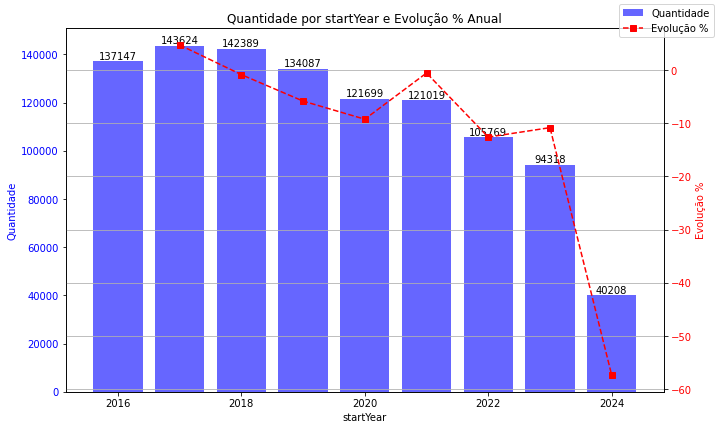

In [0]:
# Respondendo Perguntas
#  1 - Quantidade de títulos startYear a startYear a partir de 2015, e sua evolução anual em percentual.

# Filtra os startYear entre 2015 e 2024 (inclusive)
df_filtrado = df_analise[(df_analise['startYear'] > 2015) & (df_analise['startYear'] <= 2024)]

# Conta a quantidade de títulos por startYear
quantidade_por_startYear = df_filtrado['startYear'].value_counts().sort_index()

# Calcula a evolução percentual em relação ao startYear anterior
evolucao_percentual = quantidade_por_startYear.pct_change() * 100

# Cria o gráfico de barras e linhas combinadas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras para a quantidade por startYear
bars = ax1.bar(quantidade_por_startYear.index, quantidade_por_startYear.values, color='b', alpha=0.6, label='Quantidade')
ax1.set_xlabel('startYear')
ax1.set_ylabel('Quantidade', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Adiciona rótulos com a quantidade nas barras
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=10)

# Linhas para a evolução percentual
ax2 = ax1.twinx()
ax2.plot(quantidade_por_startYear.index, evolucao_percentual.values, marker='s', linestyle='--', color='r', label='Evolução %')
ax2.set_ylabel('Evolução %', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título e legenda
plt.title('Quantidade por startYear e Evolução % Anual')
fig.legend(loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

In [0]:
# 2 - Qual gênero teve maior quantidade em 2023?

# Filtra os gêneros para o ano de 2023
df_filtrado_2 = df_analise[df_analise['startYear'] == 2023]

# Contagem da quantidade de gêneros
quantidade_por_genero = df_filtrado_2['genres'].str.split(', ').explode().value_counts().reset_index()

# Renomeando as colunas do DataFrame
quantidade_por_genero.columns = ['Genre', 'Count']

# Calculando o percentual em relação ao total
total = quantidade_por_genero['Count'].sum()
quantidade_por_genero['Percent'] = (quantidade_por_genero['Count'] / total) * 100

# Exibindo o DataFrame com a quantidade de gêneros por ordem decrescente e percentual
quantidade_por_genero

,Genre,Count,Percent
0,Documentary,8574,9.090524
1,Drama,6069,6.434615
2,"Drama,Short",5574,5.909795
3,Comedy,4538,4.811383
4,Talk-Show,3972,4.211285
...,...,...,...
959,"Adult,Romance,Sci-Fi",1,0.001060
960,"Adult,Comedy,Crime",1,0.001060
961,"Animation,Crime,Documentary",1,0.001060
962,"Family,Reality-TV,Talk-Show",1,0.001060


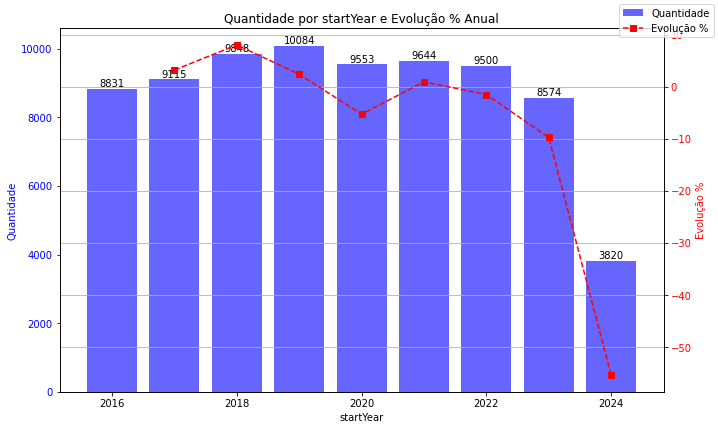

In [0]:
# 3 - Em relação a 2022, esse gênero aumentou a quantidade de filmes ou diminuiu? Resultado em quantidade e percentual.

# Filtra os startYear entre 2015 e 2024 (inclusive)
df_filtrado = df_analise[(df_analise['startYear'] > 2015) & (df_analise['startYear'] <= 2024)]
df_filtrado = df_filtrado[df_filtrado['genres'] == 'Documentary']

# Conta a quantidade de títulos por startYear
quantidade_por_startYear = df_filtrado['startYear'].value_counts().sort_index()

# Calcula a evolução percentual em relação ao startYear anterior
evolucao_percentual = quantidade_por_startYear.pct_change() * 100

# Cria o gráfico de barras e linhas combinadas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras para a quantidade por startYear
bars = ax1.bar(quantidade_por_startYear.index, quantidade_por_startYear.values, color='b', alpha=0.6, label='Quantidade')
ax1.set_xlabel('startYear')
ax1.set_ylabel('Quantidade', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Adiciona rótulos com a quantidade nas barras
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=10)

# Linhas para a evolução percentual
ax2 = ax1.twinx()
ax2.plot(quantidade_por_startYear.index, evolucao_percentual.values, marker='s', linestyle='--', color='r', label='Evolução %')
ax2.set_ylabel('Evolução %', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título e legenda
plt.title('Quantidade por startYear e Evolução % Anual')
fig.legend(loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

Análise Geral

In [0]:
'''

Foi utilizado o script para acessar o site do IMDB e baixar a base com os dados, em seguida foi feita a tratativa de remover linhas com dados nulos, para que não atrapalhasse análises posteriores, com base no objetivo. Em seguida foram criadas as tabelas dimensões e a tabela fato, através da modelagem dos dados, otimizando o máximo possível para economizar memória, mantendo a organização dos dados nas tabelas

Em seguida analisando os dados históricos, foi idenficado que tivemos uma redução de forma geral na quantidade de títulos ao longo dos anos, e no ano de 2023 o gênero que mais teve publicações foi "Documentary" com 8.574 (9%) da base e assim como o resultado geral, esse gênero também teve redução na sua evolução mensal ao longo dos anos a partir de 2022.

'''